# Exploratory Data Analysis (EDA) on Retail Sales Data

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Data Loading and Cleaning

In [36]:
df = pd.read_csv("C:\\Users\\Sandipa\\Downloads\\Sales_data.csv")

In [37]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium

In [5]:
df.shape

(2747, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object') 6


In [8]:
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))

Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 9


In [9]:
#Missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [10]:
#Checking duplicate values
df.duplicated().sum()

0

## 2. Descriptive Statistics

In [11]:
display(round(df_num.describe(),2).T)

count     mean      std     min      25%      50%  \
QUANTITYORDERED       2747.0    35.10     9.76    6.00    27.00    35.00   
PRICEEACH             2747.0   101.10    42.04   26.88    68.74    95.55   
ORDERLINENUMBER       2747.0     6.49     4.23    1.00     3.00     6.00   
SALES                 2747.0  3553.05  1838.95  482.13  2204.35  3184.80   
DAYS_SINCE_LASTORDER  2747.0  1757.09   819.28   42.00  1077.00  1761.00   
MSRP                  2747.0   100.69    40.11   33.00    68.00    99.00   

                          75%       max  
QUANTITYORDERED         43.00     97.00  
PRICEEACH              127.10    252.87  
ORDERLINENUMBER          9.00     18.00  
SALES                 4503.09  14082.80  
DAYS_SINCE_LASTORDER  2436.50   3562.00  
MSRP                   124.00    214.00

In [12]:
df.select_dtypes(include = ['object']).describe().T

count unique                    top  freq
ORDERDATE         2747    246             14/11/2018    38
STATUS            2747      6                Shipped  2541
PRODUCTLINE       2747      7           Classic Cars   949
PRODUCTCODE       2747    109               S18_3232    51
CUSTOMERNAME      2747     89  Euro Shopping Channel   259
PHONE             2747     88         (91) 555 94 44   259
ADDRESSLINE1      2747     89     C/ Moralzarzal, 86   259
CITY              2747     71                 Madrid   304
POSTALCODE        2747     73                  28034   259
COUNTRY           2747     19                    USA   928
CONTACTLASTNAME   2747     76                 Freyre   259
CONTACTFIRSTNAME  2747     72                  Diego   259
DEALSIZE          2747      3                 Medium  1349

## 3. Time Series Analysis

In [13]:
# Aggregate sales data by date
daily_sales = df.groupby('ORDERDATE').sum()['SALES']

# Display the first few rows of the aggregated data
print(daily_sales.head())

ORDERDATE
01/03/2020    53815.72
01/04/2018    38217.41
01/04/2020    37526.84
01/05/2020    33692.97
01/06/2019    50408.25
Name: SALES, dtype: float64


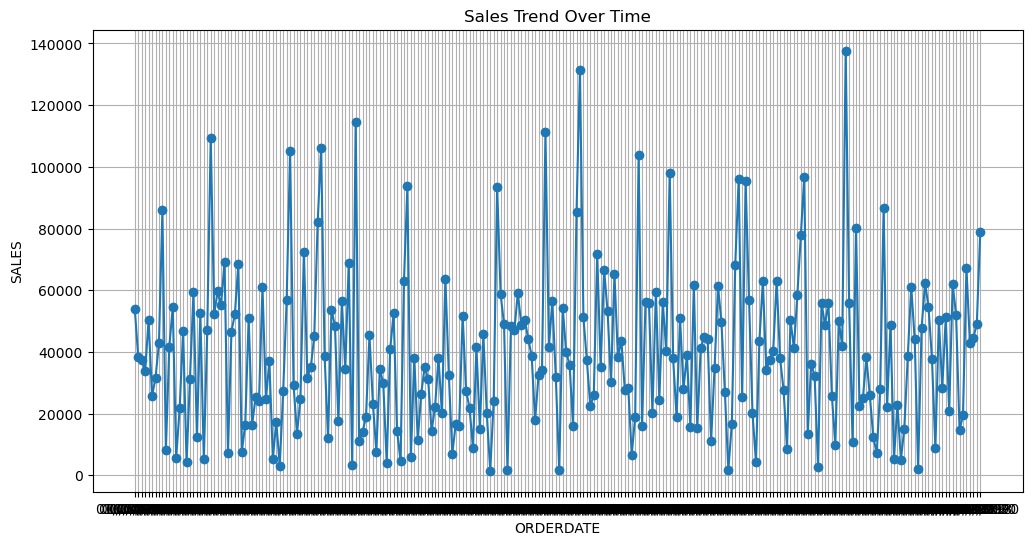

In [14]:
# Plot the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('ORDERDATE')
plt.ylabel('SALES')
plt.grid(True)
plt.show()

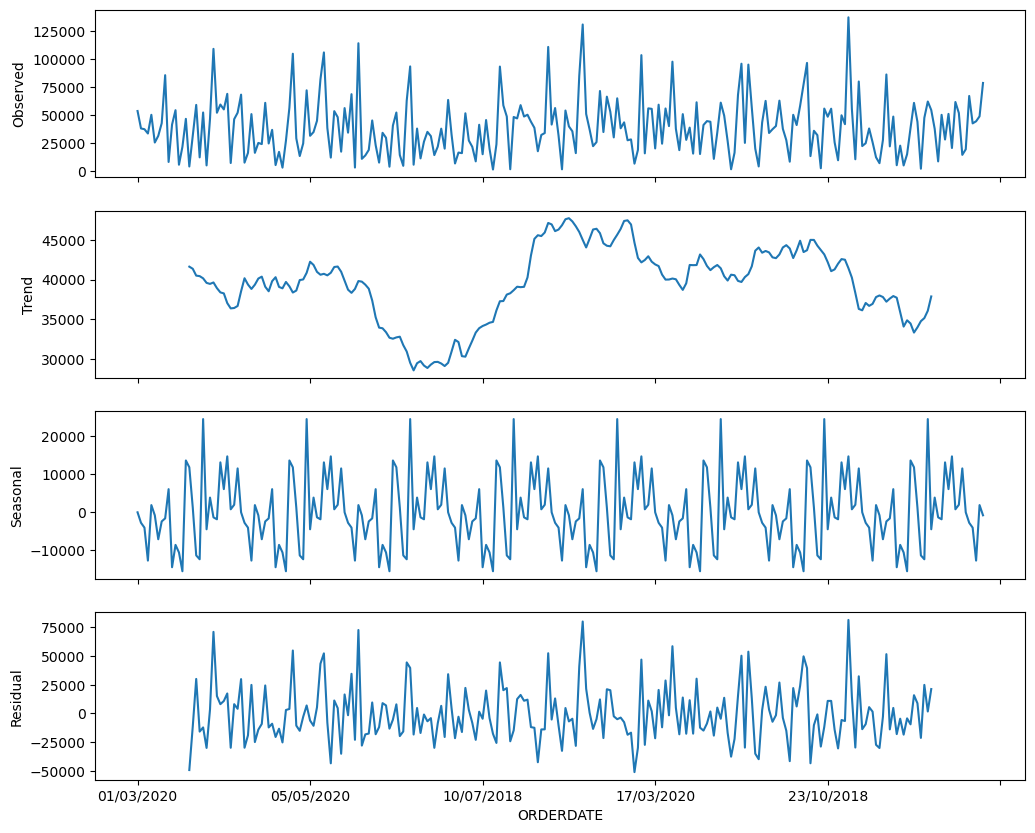

In [15]:
# Decompose the time series
decomposition = seasonal_decompose(daily_sales, model='additive', period=30)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

decomposition.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')

plt.xlabel('ORDERDATE')
plt.show()

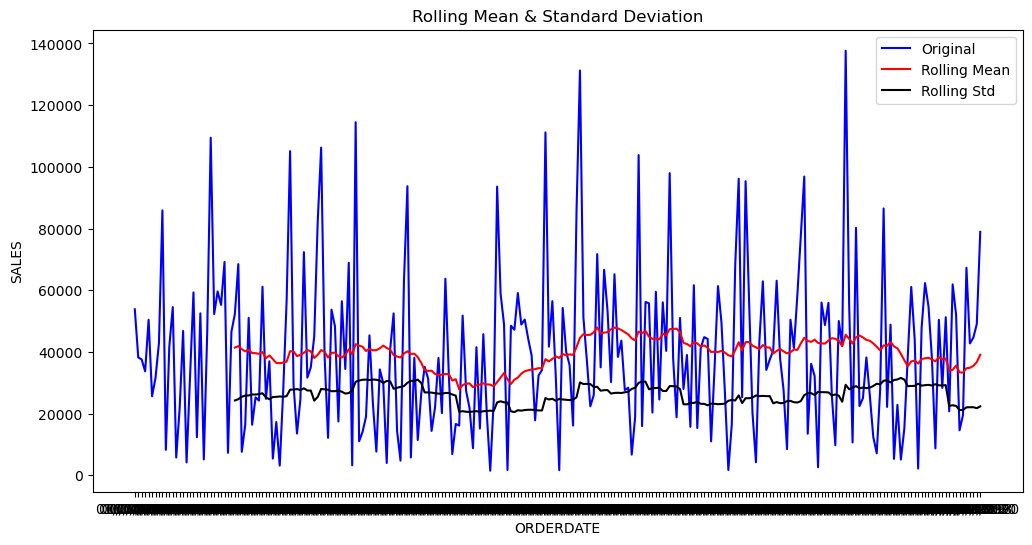

In [16]:
# Calculate rolling mean and standard deviation
rolling_mean = daily_sales.rolling(window=30).mean()
rolling_std = daily_sales.rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('ORDERDATE')
plt.ylabel('SALES')
plt.legend()
plt.show()

## Univariate Analysis

In [17]:
cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_columns:
    univariateAnalysis_category(x)

Distribution of STATUS
____________________________________________________________


       
Distribution of PRODUCTLINE
____________________________________________________________


       
Distribution of DEALSIZE
____________________________________________________________


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


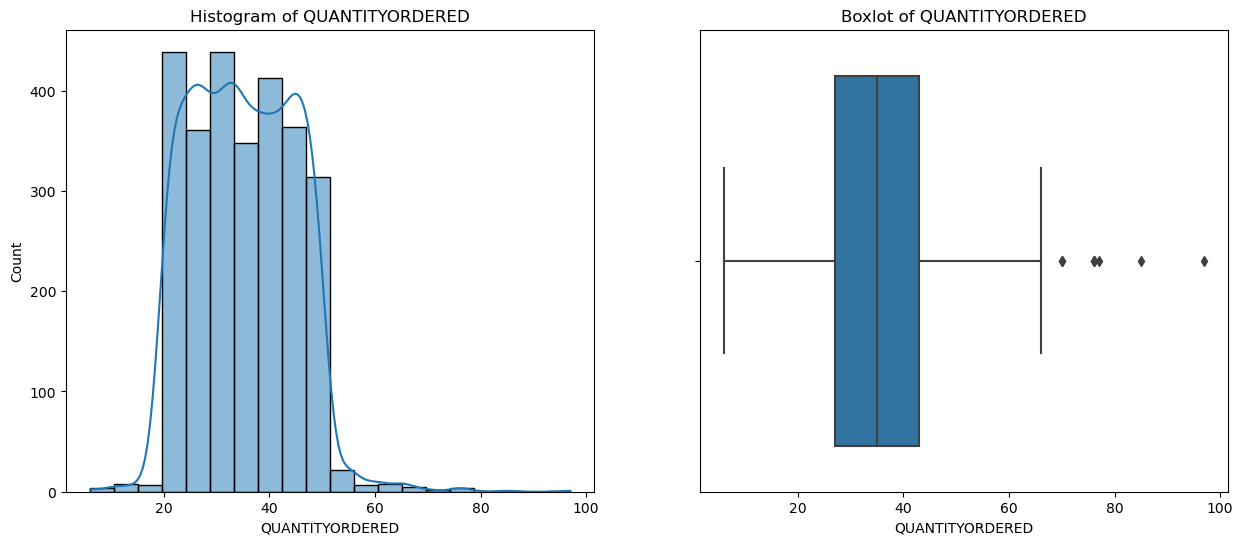

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


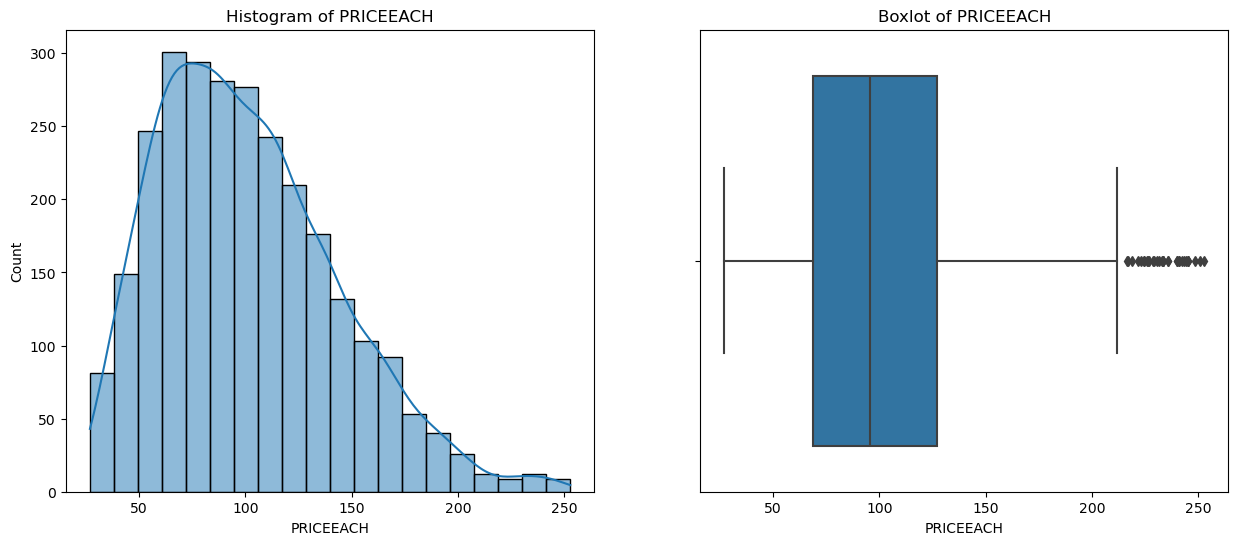

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


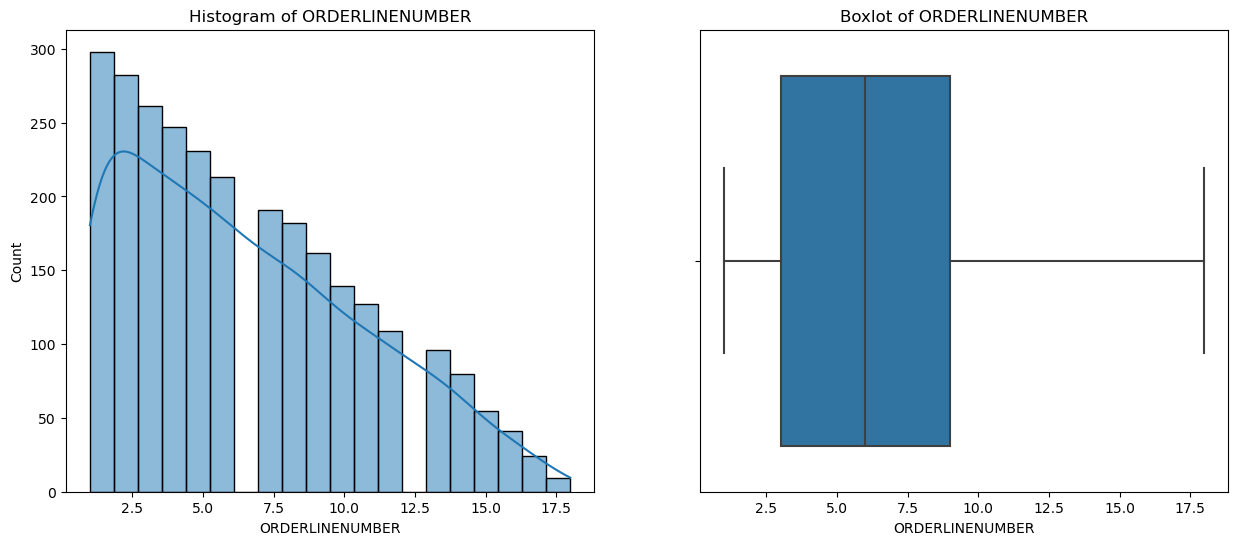

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


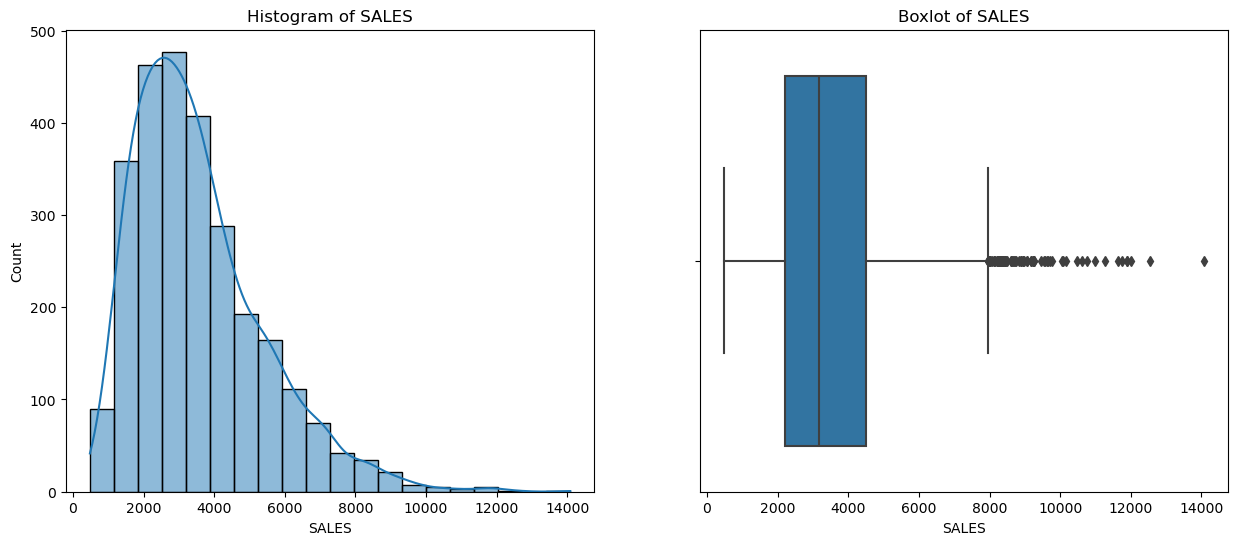

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean     1757.085912
std       819.280576
min        42.000000
25%      1077.000000
50%      1761.000000
75%      2436.500000
max      3562.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


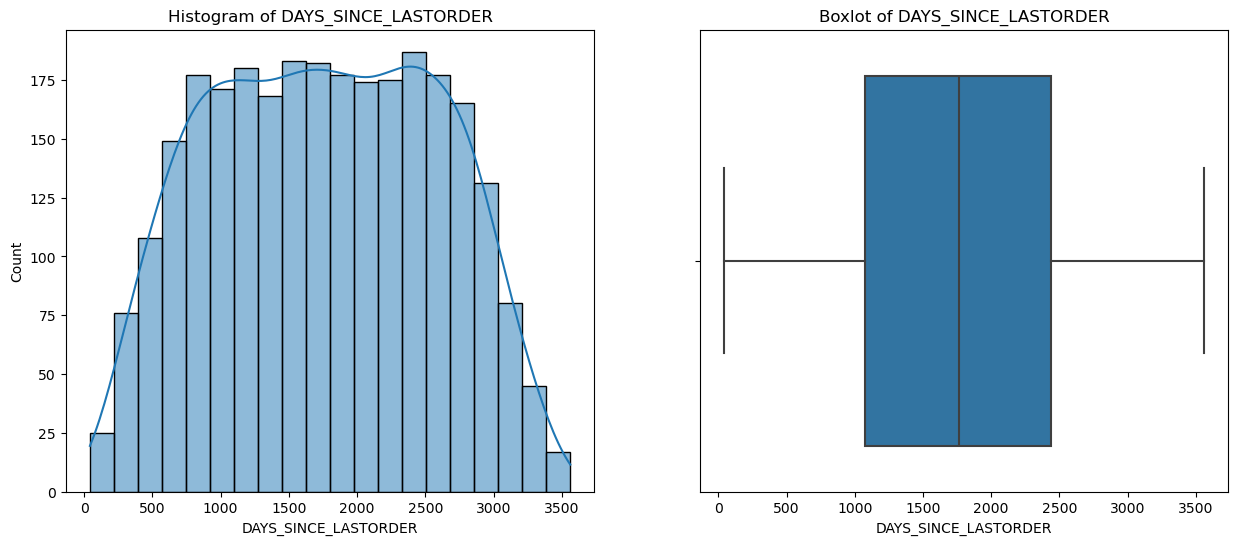

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


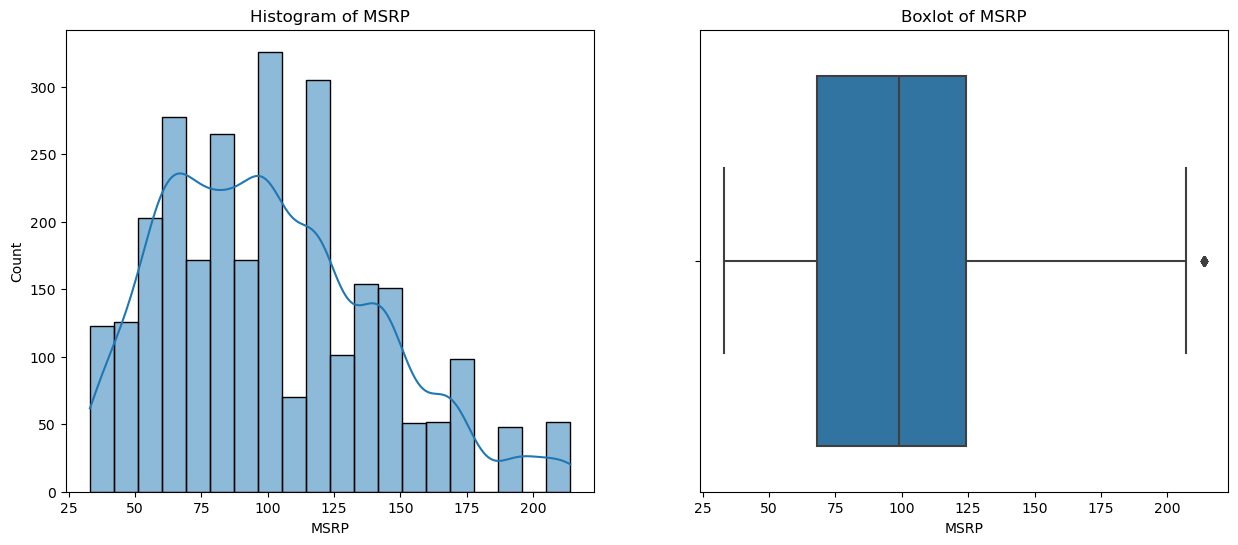

In [18]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)

In [20]:
#Top 10 Counteries
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [21]:
#Top 10 Cities
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [22]:
#Top 10 Customer
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

## Bivariate Analysis

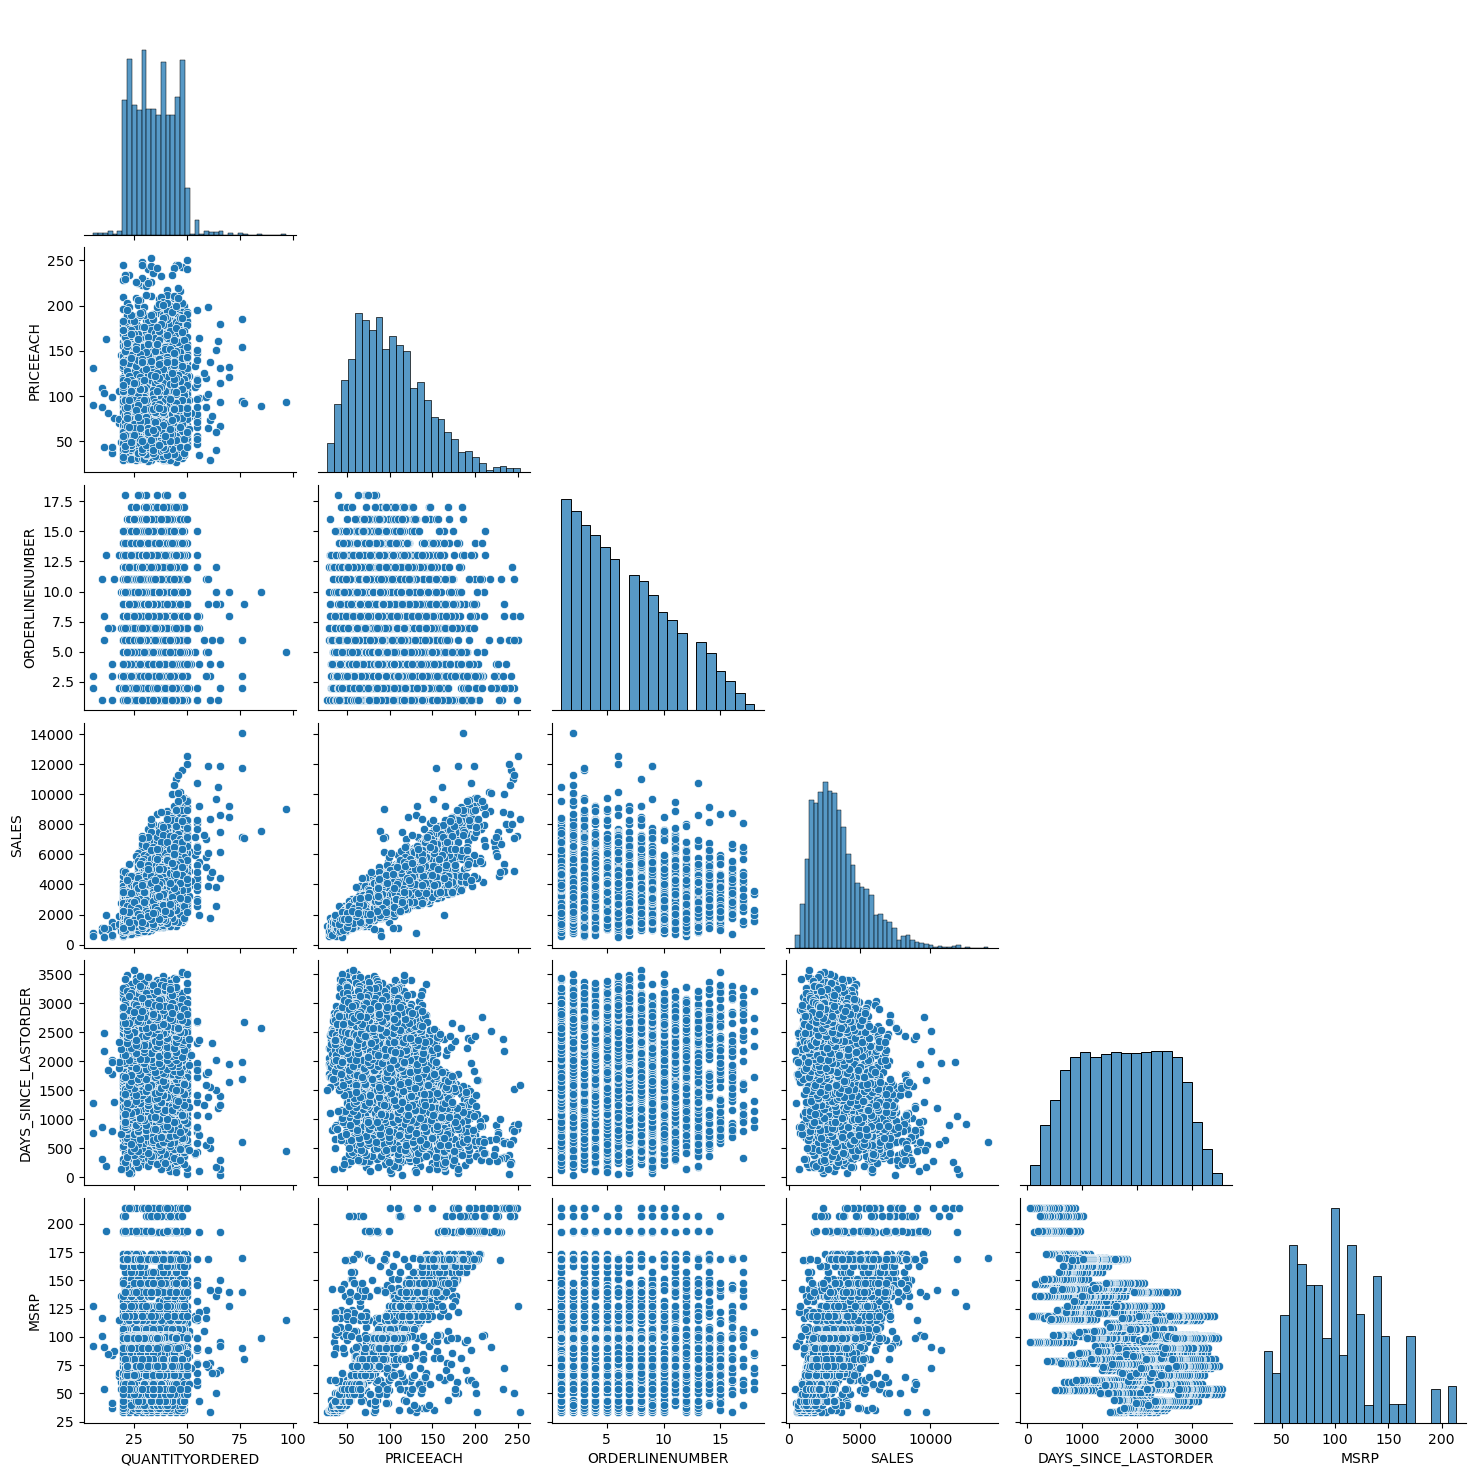

In [23]:
sns.pairplot(data=df_num, corner = True )

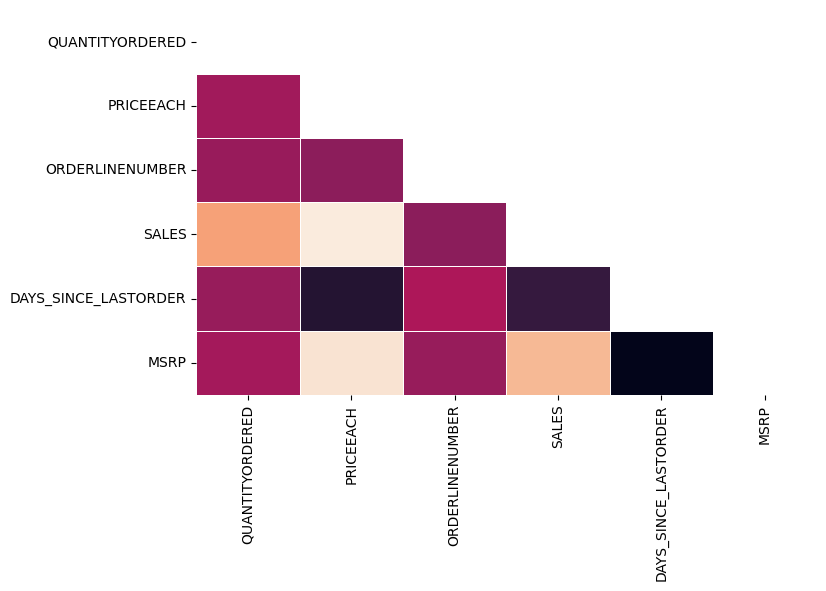

In [24]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

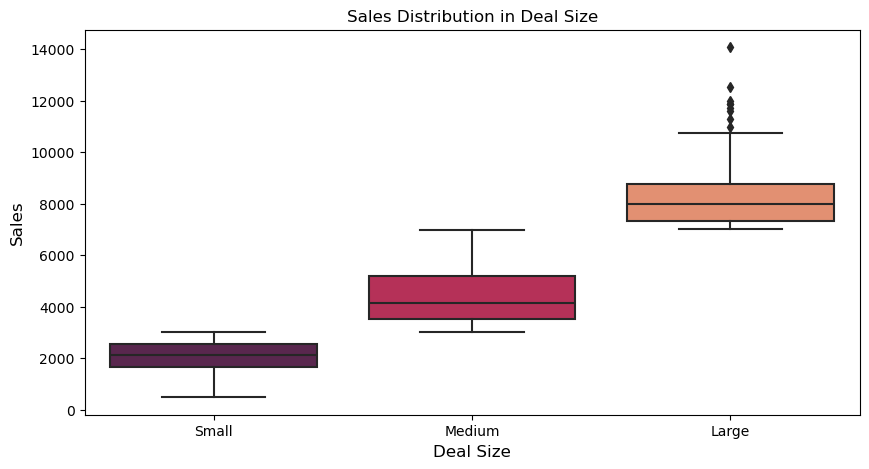

In [25]:
#Sales Distribution in Deal Size 
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

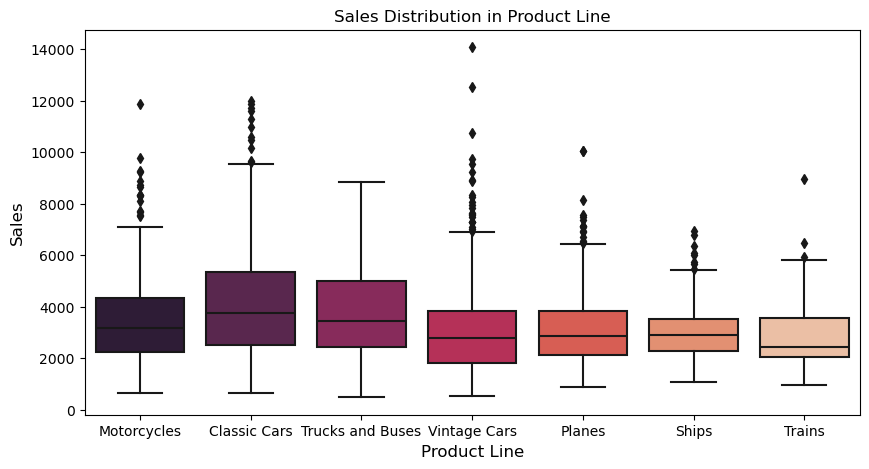

In [26]:
#Sales Distribution in Product Line
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

## Yearly, Quarterly, Monthly, weekly Sales Trend

In [39]:
# Extract year, month, week, and quarter from ORDERDATE
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

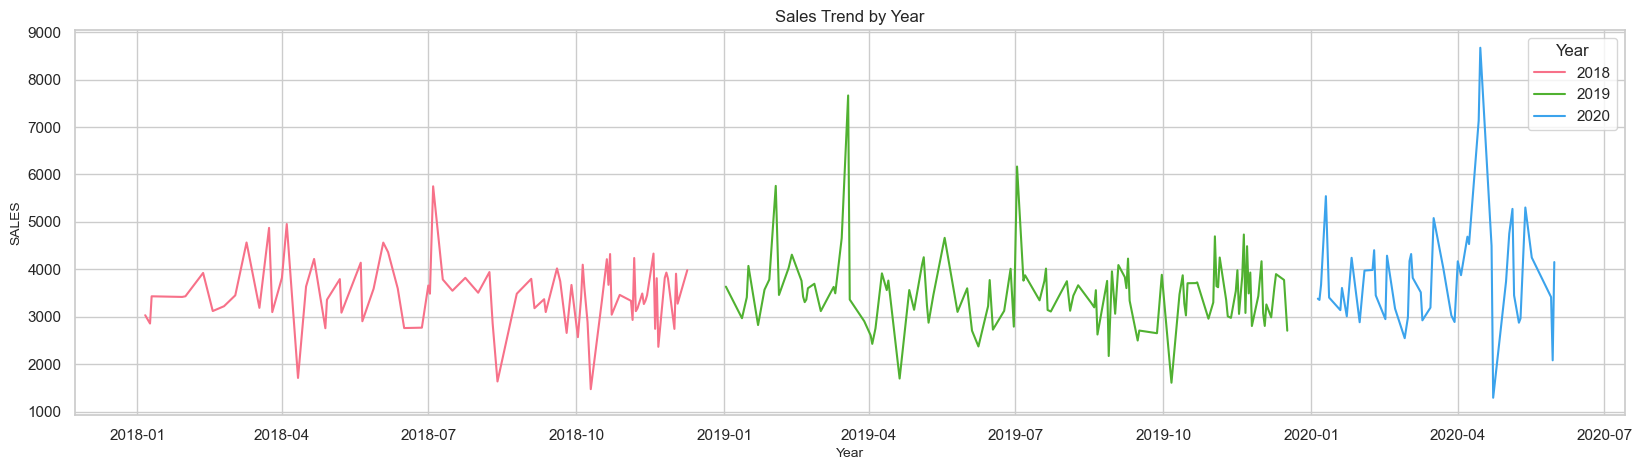

In [40]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

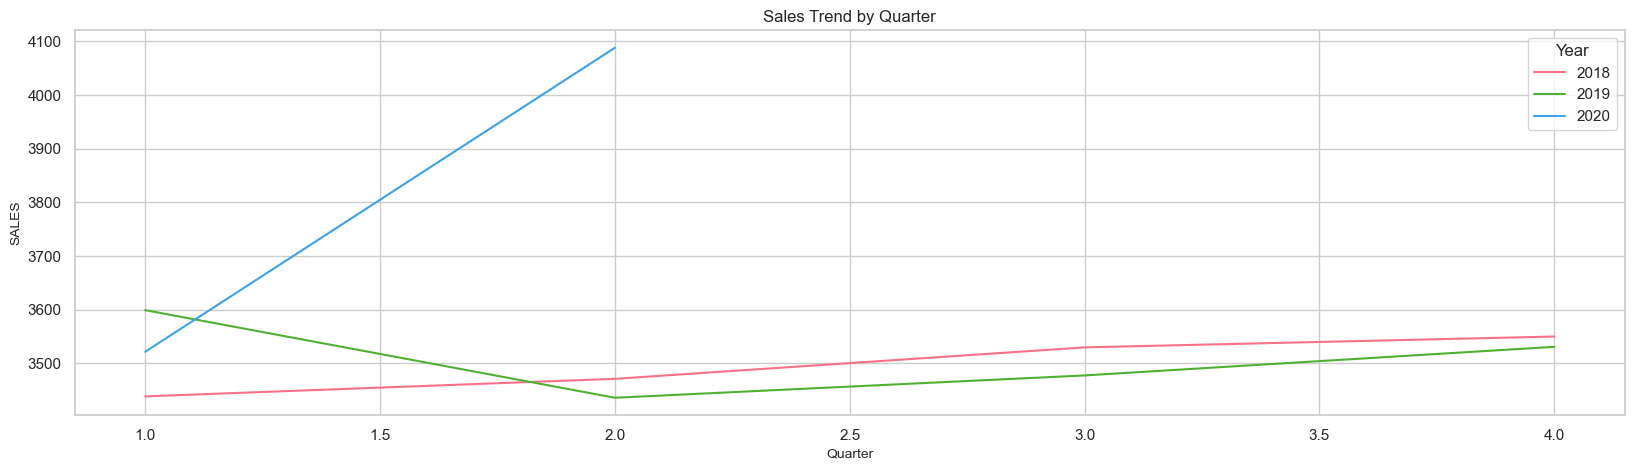

In [41]:
# Sales trend by Quarter
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

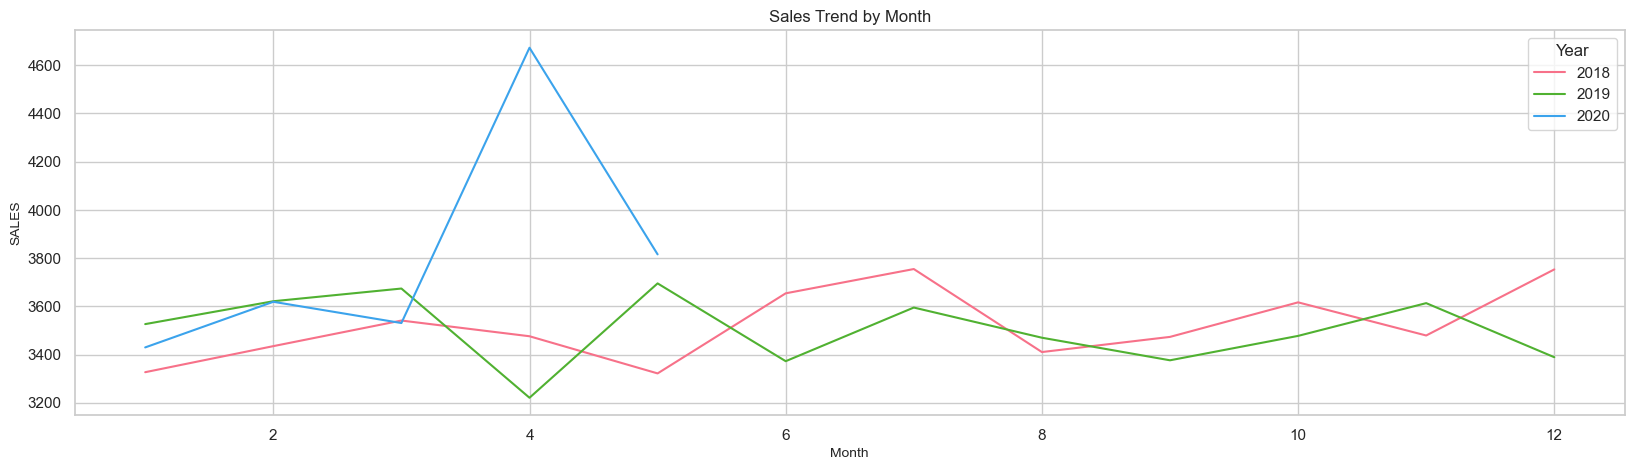

In [42]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

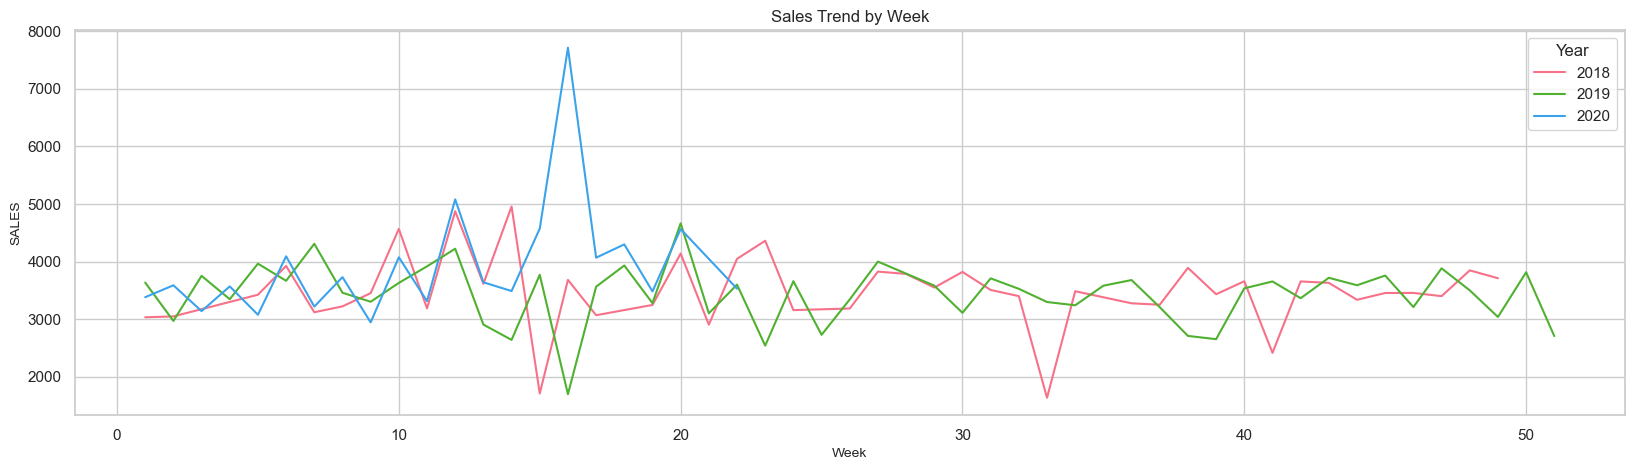

In [43]:
# Sales trend by Week
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

## Multivariate Analysis

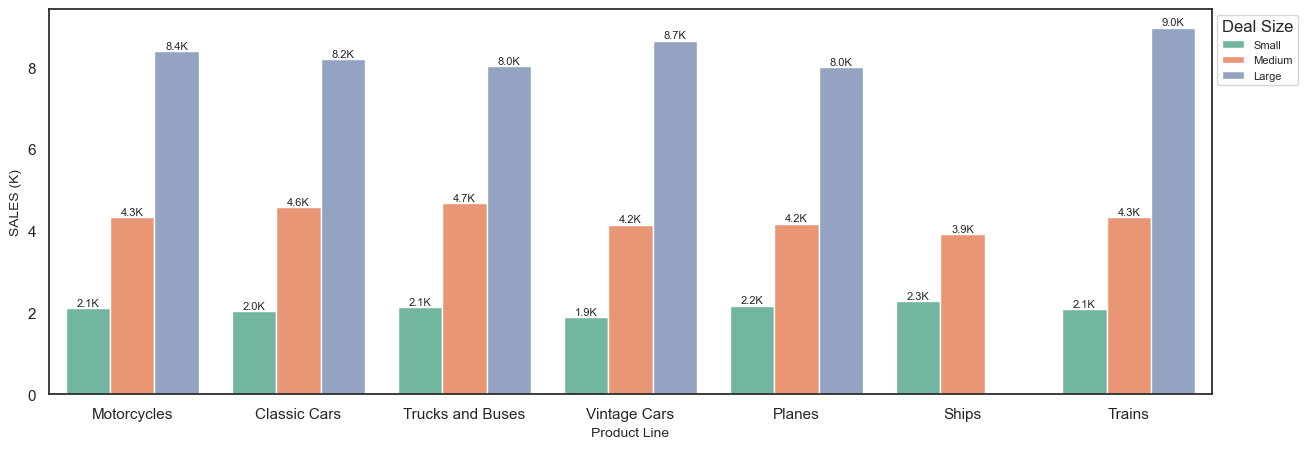

In [46]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

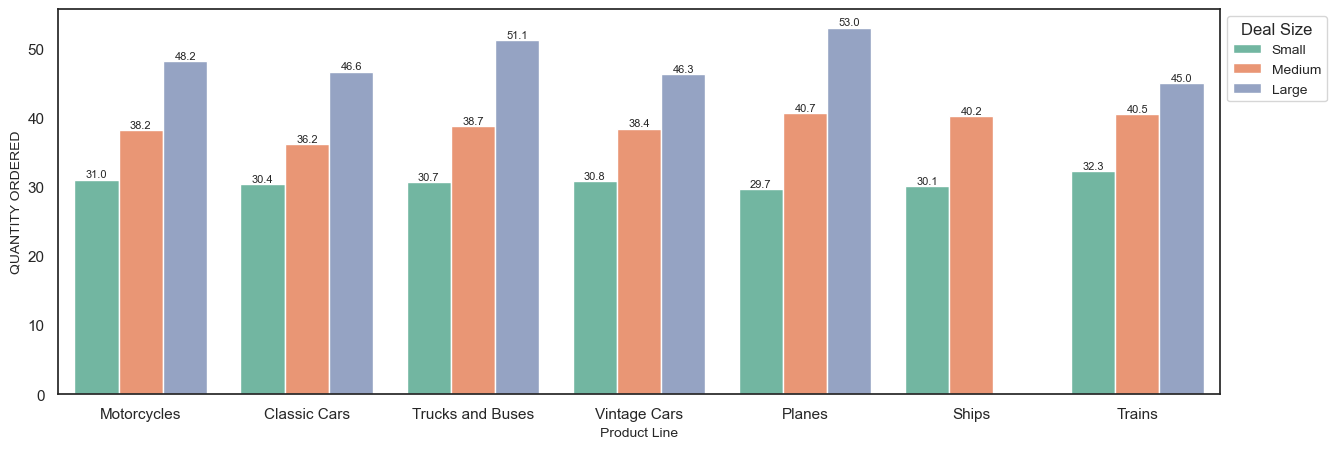

In [47]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


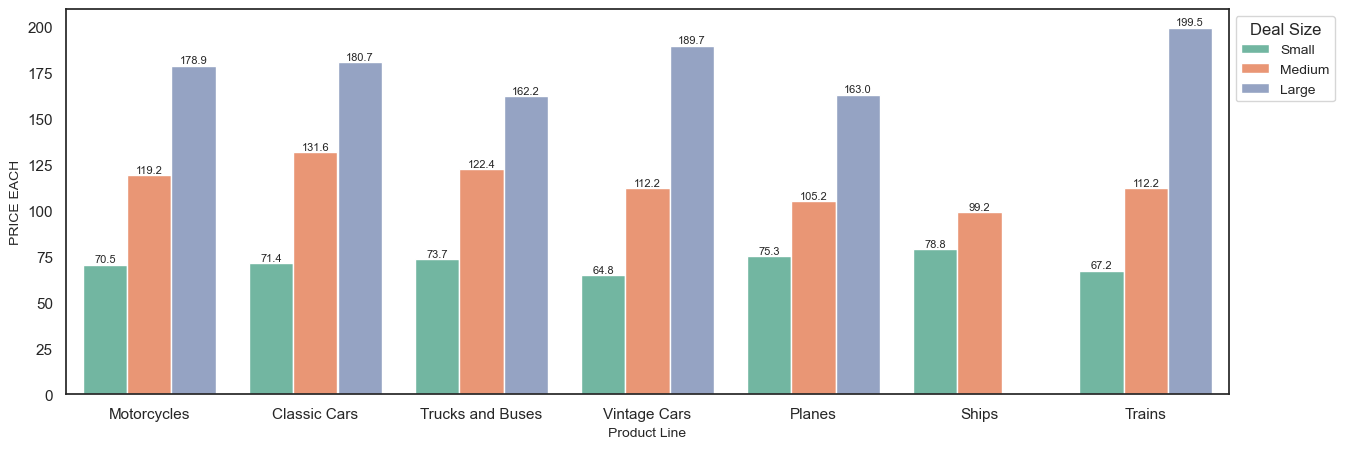

In [48]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

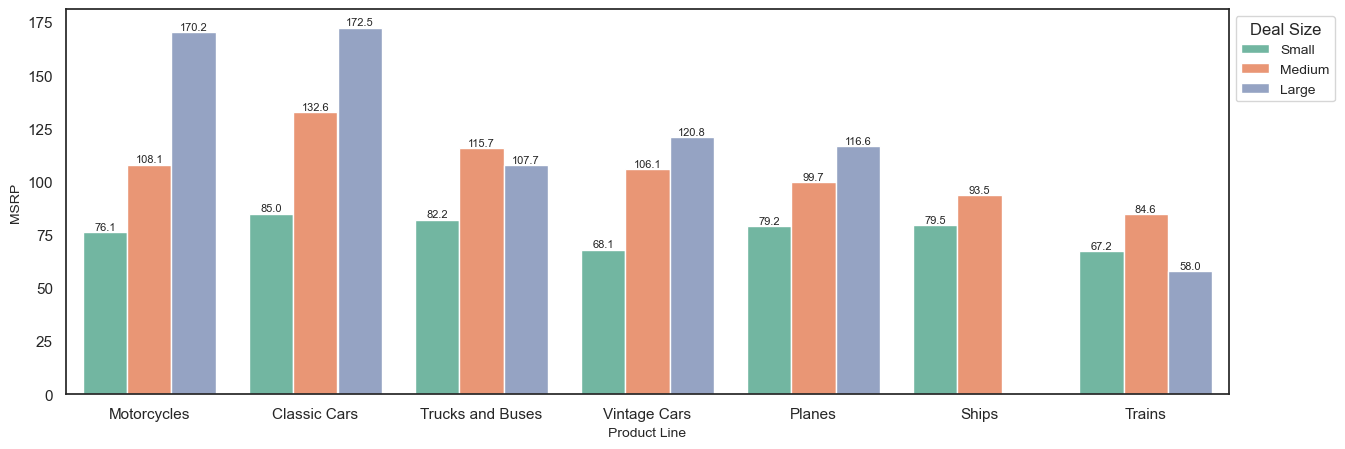

In [49]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [51]:
df['Year'] = df['ORDERDATE'].dt.year.astype(str)

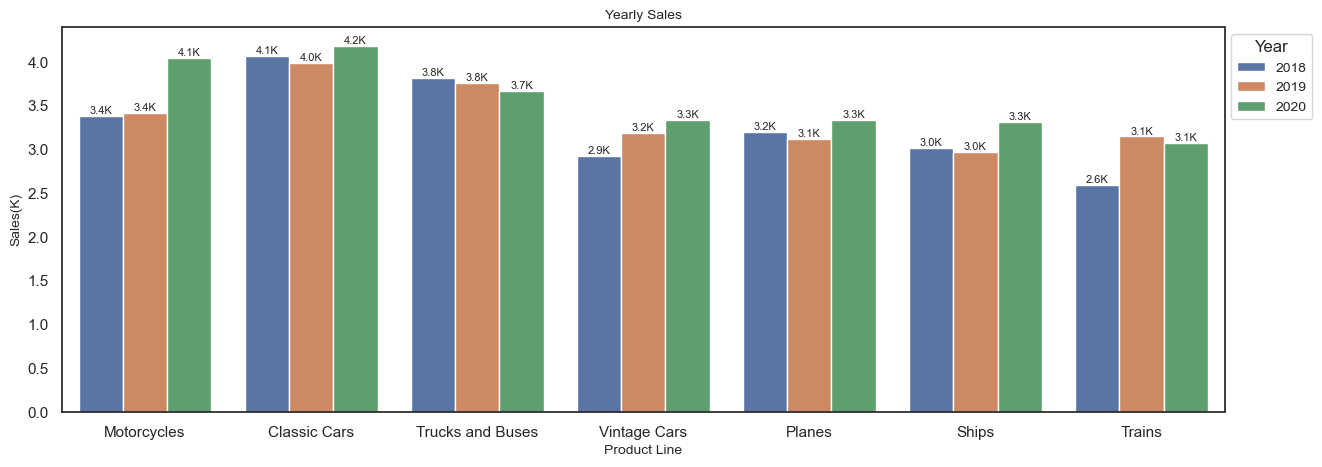

In [52]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

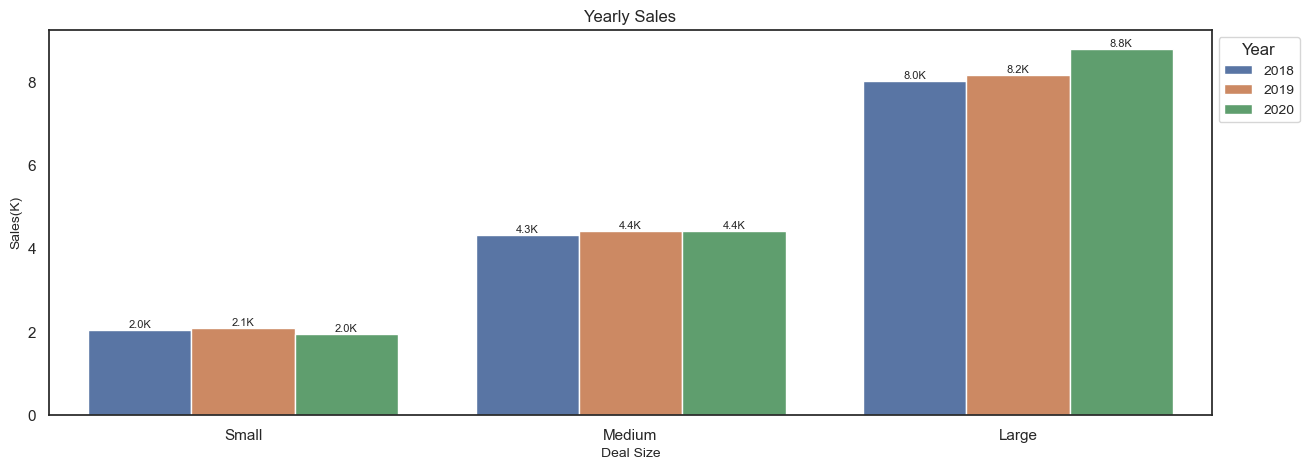

In [53]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

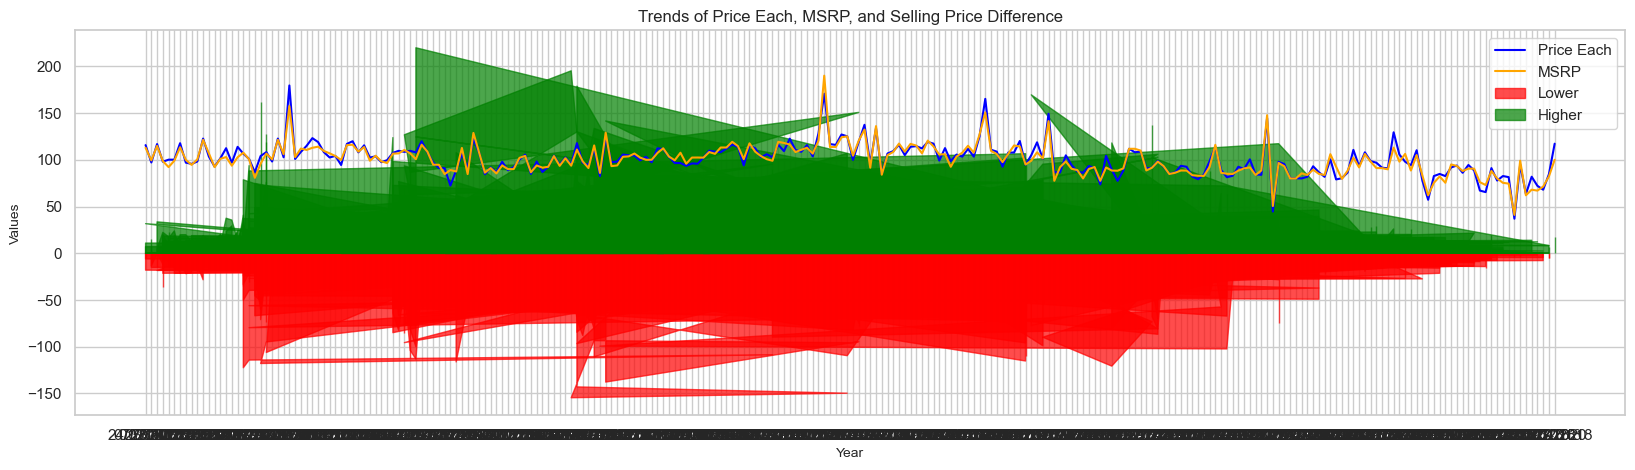

In [35]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

## Key Insights from Analysis

#### Sales Overview:

298 orders placed by 89 customers from 19 countries in the last 2.5 years.
United States leads in sales, followed by Spain and France. Notable sales from Australia and Singapore in the Eastern Hemisphere.
Among cities, Madrid tops sales, with San Diego and New York City following.
In the Eastern Hemisphere, sales from Australia and Singapore declined, while customers from Japan were added in 2019.
Significant sales increase observed in US and France in 2019.

#### Product and Revenue:

The company manufactures 109 automobile parts under 7 product lines with prices ranging from 26 to 252.
Classic Car parts generate the maximum revenue through sales (approx. 40%).
Car, Truck, Bus, and Motorcycle parts account for 80% of the company's revenue.

#### Sales Trends:

Upward sales trend with monthly seasonality. Peak sales in October and November annually.
Higher sales and customer activity in the early months of 2020 compared to previous years.

#### Concern

No new customers added since September 2019.

#### Transaction Characteristics:

Most deals are of medium and small size, with transactions typically containing 20 to 50 items.

#### Key Customers:

Euro Shopping Channel and Mini Gifts Distribution Ltd. are best customers (highest spending, most frequent, and recent).

#### Customer Retention:

A good customer retention rate of approximately 90% was observed in 2019.